In [100]:
import os


base_dir = './rps-cv-images/'


rock_dir = os.path.join(base_dir, 'rock')
paper_dir = os.path.join(base_dir, 'paper')
scissors_dir = os.path.join(base_dir, 'scissors')

print('total training rock images:', len(os.listdir(rock_dir)))
print('total training paper images:', len(os.listdir(paper_dir)))
print('total training scissors images:', len(os.listdir(scissors_dir)))



total training rock images: 1690
total training paper images: 1676
total training scissors images: 1714


In [107]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_dir = "./rps-cv-images/"


train_datagen = ImageDataGenerator(
                rescale=1./255,
                rotation_range=20,
                width_shift_range=0.1,
                height_shift_range=0.1,
                horizontal_flip=True,
                shear_range = 0.1,
                fill_mode = 'nearest',
                validation_split=0.1)

validation_datagen = ImageDataGenerator(rescale = 1.0/255,
                                        validation_split=0.4)

train_generator = train_datagen.flow_from_directory(
        train_dir,  
        target_size=(100,150),
        batch_size=32,
        class_mode='categorical',
        subset='training')
 
validation_generator = validation_datagen.flow_from_directory(
        train_dir, 
        target_size=(100,150), 
        batch_size=32,
        class_mode='categorical',
        subset='validation')

Found 4573 images belonging to 3 classes.
Found 2031 images belonging to 3 classes.


[0. 1. 0.]


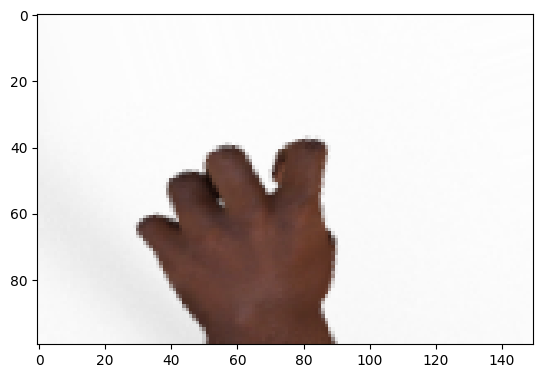

In [108]:
idx = random.randint(0, 32)
temp = next(train_generator)
print(temp[1][idx])
plt.imshow(temp[0][idx])
plt.show()

In [109]:
train_gen.class_indices

{'paper': 0, 'rock': 1, 'scissors': 2}

In [110]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dropout, Dense

model = Sequential([
    Conv2D(32, (3,3), activation="relu", input_shape=[100,150, 3]),
    MaxPooling2D(2,2),
    Dropout(0.2),
    Conv2D(16, (3,3), activation="relu"),
    MaxPooling2D(2,2),
    Dropout(0.2),
    Conv2D(32, (3,3), activation="relu"),
    MaxPooling2D(2,2),
    Dropout(0.2),
    Flatten(),
    Dense(64, activation="relu"),
    Dropout(0.2),
    Dense(3, activation="softmax")
])

In [111]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_50 (Conv2D)          (None, 98, 148, 32)       896       
                                                                 
 max_pooling2d_45 (MaxPooli  (None, 49, 74, 32)        0         
 ng2D)                                                           
                                                                 
 dropout_4 (Dropout)         (None, 49, 74, 32)        0         
                                                                 
 conv2d_51 (Conv2D)          (None, 47, 72, 16)        4624      
                                                                 
 max_pooling2d_46 (MaxPooli  (None, 23, 36, 16)        0         
 ng2D)                                                           
                                                                 
 dropout_5 (Dropout)         (None, 23, 36, 16)       

In [112]:
model.compile(loss = 'categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

In [114]:
# Train the model
history = model.fit(train_generator, epochs=15, validation_data = validation_generator, verbose = 1, validation_steps=3)

Epoch 1/15
143/143 [==============================] - 34s 239ms/step - loss: 1.0671 - accuracy: 0.4015 - val_loss: 1.0119 - val_accuracy: 0.6250
Epoch 2/15
143/143 [==============================] - 18s 124ms/step - loss: 0.7636 - accuracy: 0.6661 - val_loss: 0.5858 - val_accuracy: 0.8542
Epoch 3/15
143/143 [==============================] - 18s 125ms/step - loss: 0.5106 - accuracy: 0.7962 - val_loss: 0.4054 - val_accuracy: 0.8646
Epoch 4/15
143/143 [==============================] - 18s 125ms/step - loss: 0.3956 - accuracy: 0.8465 - val_loss: 0.2916 - val_accuracy: 0.9167
Epoch 5/15
143/143 [==============================] - 18s 125ms/step - loss: 0.3202 - accuracy: 0.8841 - val_loss: 0.3104 - val_accuracy: 0.8750
Epoch 6/15
143/143 [==============================] - 18s 126ms/step - loss: 0.2708 - accuracy: 0.9051 - val_loss: 0.2667 - val_accuracy: 0.9062
Epoch 7/15
143/143 [==============================] - 18s 125ms/step - loss: 0.2407 - accuracy: 0.9162 - val_loss: 0.2149 - val_ac

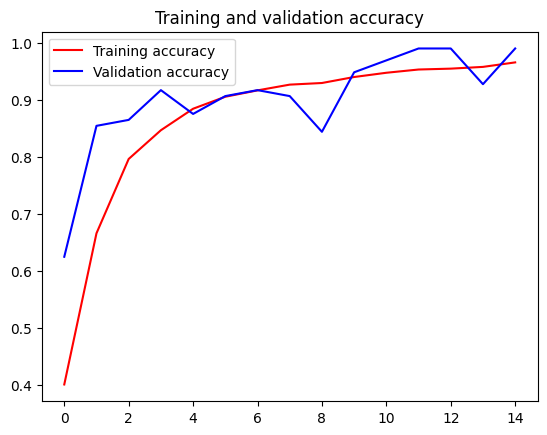

<Figure size 640x480 with 0 Axes>

In [115]:
import matplotlib.pyplot as plt


# Plot the results
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']


epochs = range(len(acc))


plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()


plt.show()


In [116]:
model_name = 'rock_paper_scissors_cnn_combined_data.h5'
model.save(model_name, save_format='h5')

d:\hasan\MyChannels\developer compass\codes\rps\rps_env\Lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1/1 [==============================] - 0s 21ms/step




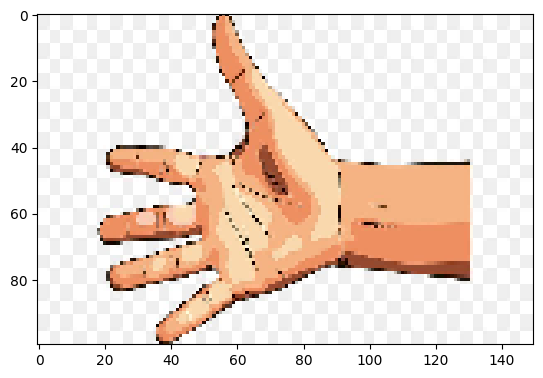


Image prediction result:  Paper
Probability:  100.0 %




In [121]:


img = load_img("./test_4.jpg", target_size=(100,150))

result = predict_image(img)

In [64]:
def label(output):
    if output[0][0]>0.5:
        return "paper"
    elif output[0][1]>0.5:
        return "rock"
    elif output[0][2]>0.5:
        return "scissor"

In [85]:
from tensorflow.keras.utils import load_img, img_to_array
import numpy as np

def predict_image(image_upload, model = model):
  im = image_upload
  im_array = np.asarray(im)
  im_array = im_array*(1/225)
  im_input = tf.reshape(im_array, shape = [1, 100, 150, 3])

  predict_proba = sorted(model.predict(im_input)[0])[2]
  predict_class = np.argmax(model.predict(im_input))

  if predict_class == 0:
      predict_label = 'Paper'
  elif predict_class == 1:
      predict_label = 'Rock'
  else:
      predict_label = 'Scissor'

  print('\n')
  plt.imshow(image_upload)
  plt.show()
  print("\nImage prediction result: ", predict_label)
  print("Probability: ", round(predict_proba*100,2), "%")
  print('\n')

1/1 [==============================] - 0s 23ms/step




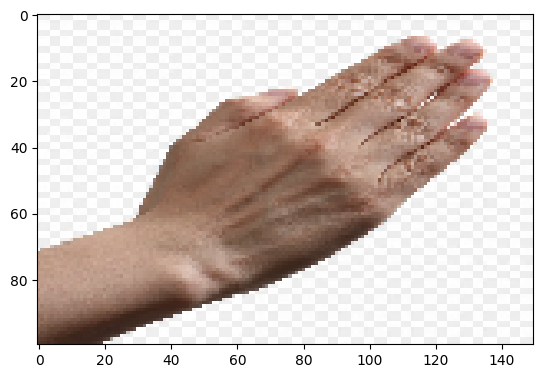


Image prediction result:  Paper
Probability:  100.0 %




In [96]:


img = load_img("./test_8.jpg", target_size=(100,150))

result = predict_image(img)

In [53]:
np.sum(result)

1.0